In [1]:
# ------------------------------------------------------------
# Northwestern University 
# MSDS 422
# W2 Evaluating Classification Models
# Author Enis Becirbegovic
# -------------------------------------------------------------
# S1 Run SetUp Script to Install Packages 
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import matplotlib.cbook as cbook
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
# import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
import itertools
from collections import Counter
import math
import scipy.stats as ss
sns.set()

In [2]:
#Change working directory
import os
os.getcwd()
os.chdir('../data')
os.getcwd()

'C:\\Users\\enisbe\\Google Drive New\\NW\\MSDS 422\\data'

In [3]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 0

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)
(4521, 17)


# Data quality and exploration

In [4]:
bank.describe(include='all') 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [6]:
print("----Dataset Description-------")
print("Observations:",bank.shape[0]) 
print("Total Variables:", bank.shape[1]) 
print("Categorical:",sum(bank.dtypes==object))
print("Null or missing:",bank.isnull().sum().sum())

 

----Dataset Description-------
Observations: 4521
Total Variables: 17
Categorical: 10
Null or missing: 0


### Data Conversion and preparation

In [7]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design
# pd.DataFrame(model_data,columns=['default','housing','loan'])
bank_modeling = pd.DataFrame(model_data,columns=['default','housing','loan','response'])

(4521, 4)


## Cross Tabs

In [8]:
tab1 = pd.crosstab(bank['response'],bank['default'], margins=True, normalize='columns')
tab2 = pd.crosstab(bank['response'],bank['default'], margins=True)

print("----Crosstab normalized by column: response by default-------")
print(tab1)
print("\n----Crosstab count: response by default-------")
print(tab2)

----Crosstab normalized by column: response by default-------
default         no       yes      All
response                             
no        0.884814  0.881579  0.88476
yes       0.115186  0.118421  0.11524

----Crosstab count: response by default-------
default     no  yes   All
response                 
no        3933   67  4000
yes        512    9   521
All       4445   76  4521


In [9]:
tab1 = pd.crosstab(bank['response'], bank['housing'], margins=True, normalize='columns')
tab2 = pd.crosstab(bank['response'], bank['housing'], margins=True )

print("----Crosstab normalized by column: response by housing-------")
print(tab1)
print("\n----Crosstab count: response by housing-------")
print(tab2)

----Crosstab normalized by column: response by housing-------
housing         no       yes      All
response                             
no        0.846585  0.914029  0.88476
yes       0.153415  0.085971  0.11524

----Crosstab count: response by housing-------
housing     no   yes   All
response                  
no        1661  2339  4000
yes        301   220   521
All       1962  2559  4521


In [10]:
tab1 = pd.crosstab(bank['response'], bank['loan'], margins=True, normalize='columns')
tab2 = pd.crosstab(bank['response'], bank['loan'], margins=True )


print("----Crosstab normalized by column: response by loan-------")
print(tab1)
print("\n----Crosstab count: response by loan-------")
print(tab2)

----Crosstab normalized by column: response by loan-------
loan            no       yes      All
response                             
no        0.875196  0.937771  0.88476
yes       0.124804  0.062229  0.11524

----Crosstab count: response by loan-------
loan        no  yes   All
response                 
no        3352  648  4000
yes        478   43   521
All       3830  691  4521


# Bar Plots - Counts

In [1]:
sns.set()
fig, ax = plt.subplots(1,3, figsize=(15, 3), sharey=False)
print("\t\t\t\t\t-------Bar Plots - counts---------") 
y =  'response'
x = ['default', 'loan', 'housing']
for i,x in enumerate(x):
 
    
    (bank
    .groupby(x)[y]
    .value_counts(normalize=False)
    .mul(100)
    .rename('count')
    .reset_index().pipe((sns.catplot,'data'), x=x,y='count',hue=y,kind='bar',ax=ax[i]))
    plt.close()

NameError: name 'sns' is not defined

# Bar Plots - Relative (percenatage)

					-------Bar Plots - percentage---------


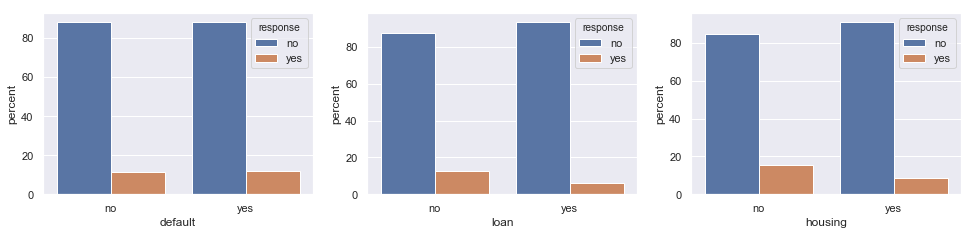

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15, 3), sharey=False)
print("\t\t\t\t\t-------Bar Plots - percentage---------") 

y =  'response'
x = ['default', 'loan', 'housing']
for i,x in enumerate(x):    
    (bank
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',ax=ax[i]))
    plt.close()
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=.2)

### Balance variable by response and for 3 binary variables

			-------Distribution - by response and three variables ---------


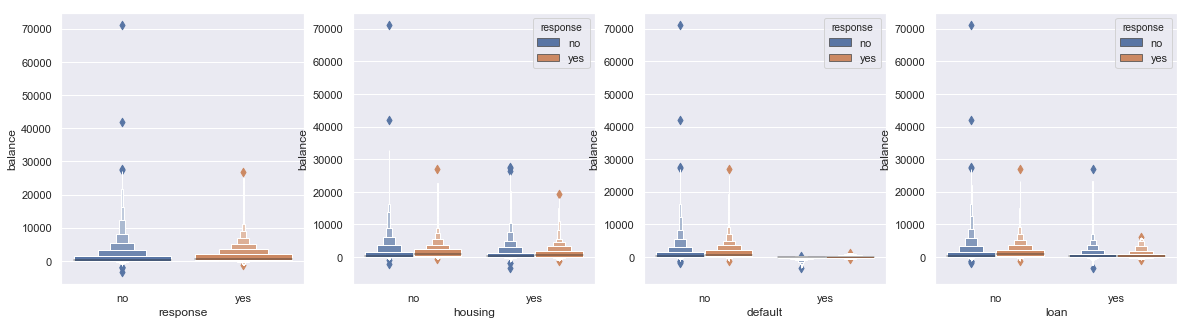

In [13]:
 
fig, ax = plt.subplots(1,4, figsize=(20, 5), sharey=False)
print("\t\t\t-------Distribution - by response and three variables ---------") 
sns.catplot(x='response',y='balance', kind='boxen',data=bank, ax=ax[0])
plt.close()
sns.catplot(x='housing',y='balance',hue='response',kind='boxen',data=bank, ax=ax[1]) 
plt.close()
sns.catplot(x='default',y='balance',hue='response',kind='boxen',data=bank, ax=ax[2])
plt.close()
sns.catplot(x='loan',y='balance',hue='response',kind='boxen',data=bank, ax=ax[3])
plt.close()

# Correlation - Cramer

In [14]:


# REPLACE = 'replace'
# DROP = 'drop'
# DROP_SAMPLES = 'drop_samples'
# DROP_FEATURES = 'drop_features'
# SKIP = 'skip'
# DEFAULT_REPLACE_VALUE = 0.0


def conditional_entropy(x,y):
   
 
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x,y ):
 
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
def theils_u_matrix(df, categorical_columns=[],unique_threshold=100):
    
    catCols = df.columns  

    correaltion_matrix = pd.DataFrame(np.ones((len(catCols),len(catCols))), index=catCols, columns=catCols)
    for var1, var2 in itertools.combinations(catCols,2):
        correaltion_matrix.loc[var1,var2]= theils_u(df[var1],df[var2])
        correaltion_matrix.loc[var2,var1]= theils_u(df[var2],df[var1])
    return correaltion_matrix



def cramers_v(x,y):
     

    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def cramer_v_matrix(df, categorical_columns=[],unique_threshold=100):
    
    catCols = df.columns  

    correaltion_matrix = pd.DataFrame(np.ones((len(catCols),len(catCols))), index=catCols, columns=catCols)
    for var1, var2 in itertools.combinations(catCols,2):
        correaltion_matrix.loc[var1,var2]= cramers_v(df[var1],df[var2])
        correaltion_matrix.loc[var2,var1]= cramers_v(df[var1],df[var2])
    return correaltion_matrix

def corr_chart(df_corr):
    corr= df_corr
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(3,3 ))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')     ;       
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')  
 

In [15]:
print('-----Cramer Correlation---------')
cor = cramer_v_matrix(bank_modeling)
cor

-----Cramer Correlation---------


,default,housing,loan,response
default,1.000000,0.000000,0.059787,0.000000
housing,0.000000,1.000000,0.009834,0.102927
loan,0.059787,0.009834,1.000000,0.067953
response,0.000000,0.102927,0.067953,1.000000


-----Cramer Correlation---------


<Figure size 432x288 with 0 Axes>

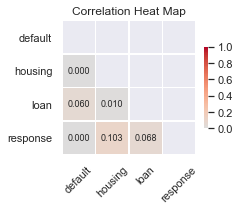

In [16]:
print('-----Cramer Correlation---------')
corr_chart(cor)

In [17]:
print('-------Correlation Rank---------')

cor.response.sort_values(ascending=False).to_frame()

-------Correlation Rank---------


,response
response,1.000000
housing,0.102927
loan,0.067953
default,0.000000


## Grid Search

In [18]:
# X vs y
X = bank_modeling.drop('response', axis=1)
y= bank_modeling['response']

In [19]:
# SET parmetar space for Grid Search
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =0)
 
lr_param = {'C': [0.001, 0.01, 0.1, 1, 5, 10]}
nb_param = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}
print("Parameter grid for Logistic Regression (LR):\n{}".format(lr_param))
print("Parameter grid forNaive Bayes (NB):\n{}".format(nb_param))


Parameter grid for Logistic Regression (LR):
{'C': [0.001, 0.01, 0.1, 1, 5, 10]}
Parameter grid forNaive Bayes (NB):
{'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}


In [20]:
#LR - Grid Search
gs_lr = GridSearchCV(LogisticRegression(), lr_param, cv=10, scoring="roc_auc", return_train_score=True)
gs_lr.fit(X_train , y_train )
print("Test set score: {:.2f}".format(gs_lr.score(X_test , y_test )))
print("Best parameters: {}".format(gs_lr.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_lr.best_score_))
print("Best estimator:\n{}".format(gs_lr.best_estimator_))

Test set score: 0.59
Best parameters: {'C': 1}
Best cross-validation score: 0.62
Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
#NB - Grid Search
gs_nb =GridSearchCV(BernoulliNB(binarize=0.5, class_prior = [0.5, 0.5], fit_prior=False), nb_param, cv=10, 
                    scoring="roc_auc", return_train_score=True)                
gs_nb.fit(X_train, y_train)
print("Test set score: {:.2f}".format(gs_nb.score(X_test, y_test)))
print("Best parameters: {}".format(gs_nb.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_nb.best_score_))
print("Best estimator:\n{}".format(gs_nb.best_estimator_))


Test set score: 0.59
Best parameters: {'alpha': 5}
Best cross-validation score: 0.62
Best estimator:
BernoulliNB(alpha=5, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


# Kfold cross validation

In [22]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

In [23]:
classiferNB = BernoulliNB(alpha=5, binarize=0.5, class_prior = [0.5, 0.5], fit_prior=False)
classiferLR = LogisticRegression(C=1)

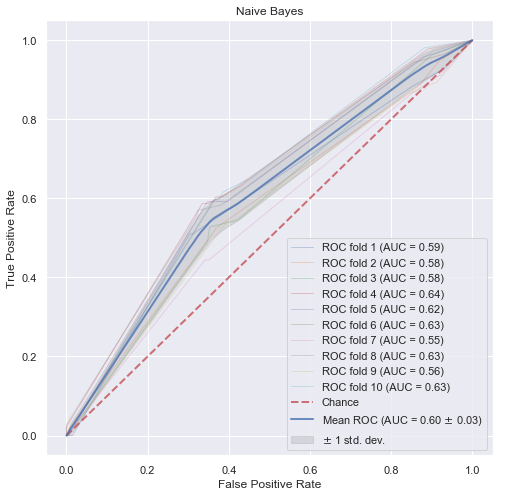

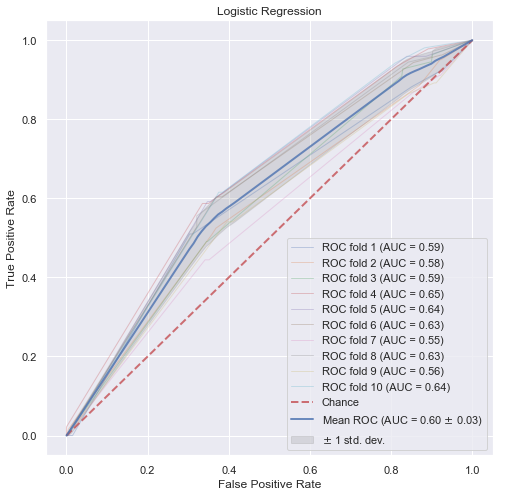

In [24]:
 
def kfold_classifier(classifier,title):
    cv = KFold(n_splits = 10, shuffle=True,random_state=0)
    tprs = []
    aucs = []
    X = bank_modeling.drop('response', axis=1)
    y= bank_modeling['response']
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(8, 8))
    for i, (train, test) in enumerate(cv.split(X, y)):
         
        classifier.fit(X.loc[train], y.loc[train])
        viz = plot_roc_curve(classifier, X.loc[test], y.loc[test],
                             name='ROC fold {}'.format(i+1),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.title(title)
    plt.savefig("../Assignments/pic"+title)
    plt.show()
    
kfold_classifier(classiferNB,title="Naive Bayes")
kfold_classifier(classiferLR, title="Logistic Regression")


## Resample

* In the next step we are upsampling 

In [25]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc
from sklearn.utils import resample


In [26]:
def resampling():
    global X_train, y_train , X_test , y_test
    train, test =   train_test_split(bank_modeling, test_size = 0.30, random_state = 0)
    # train
    minority= train[train['response']==1]
    majority= train[train['response']==0]

    train_new=resample(minority, replace=True,n_samples=len(majority),random_state=123)
    train_new=pd.concat([majority,train_new])

    X_train =  train_new.drop('response', axis=1)
    y_train =  train_new['response']
    
    
    minority= test[test['response']==1]
    majority= test[test['response']==0]

    test_new=resample(minority, replace=True,n_samples=len(majority),random_state=123)
    test_new=pd.concat([majority,test_new])
    
    
    X_test = test_new.drop('response', axis=1)
    y_test= test_new['response']
    
    
  

In [27]:
 
def prediction_metrics(classifier,regType ):
    resampling()
    
    classifier.fit(X_train, y_train)
    
    auc_score_train=auc(y_train, classifier.predict_proba(X_train)[:,1] )
    acu_score_test=auc(y_test, classifier.predict_proba(X_test)[:,1] )
    precision_train= precision_score(y_train, classifier.predict(X_train) )
    precision_test= precision_score(y_test, classifier.predict(X_test) )
    recall_train=   recall_score(y_train, classifier.predict(X_train) )
    recall_test=  recall_score(y_test, classifier.predict(X_test) )
    accuracy_train=   accuracy_score(y_train, classifier.predict(X_train) )
    accuracy_test=   accuracy_score(y_test, classifier.predict(X_test) )
    print("\n--------"+ regType + "------------")
    
    print('\nConfusion Matrix Training')
    print(confusion_matrix(y_train, classifier.predict(X_train)  ))
    print('\nConfusion Matrix testing')
    print( confusion_matrix(y_test, classifier.predict(X_test) ))
    print('\nTraining AUC')
    print(auc_score_train)
    print('\nTest  AUC')
    print(acu_score_test)

    
    print('\nPrecision Train')
    print(precision_train)
    print('\nPrecision Test')
    print(precision_test)
    print('\nRecall train')
    print( recall_train)
    print('\nRecall test')
    print( recall_test)
  
    print('\nAccurancy train')
    print( accuracy_train)
    
    print('\nAccurancy test')
    print( accuracy_test)
    
    
    return [(auc_score_train,precision_train, recall_train, accuracy_train),
            (acu_score_test,precision_test, recall_test, accuracy_test) ]


In [28]:
print("-----------Confusion Matrices--------")   
train_metricLR, test_metricLR = prediction_metrics(classiferLR, regType="Logistic Regression" )

train_metricNB, test_metricNB = prediction_metrics(classiferNB, regType="Naive Bayes " )


train_metric = pd.DataFrame([pd.Series(train_metricLR), pd.Series(train_metricNB) ], index=["Logistic Regression",'Naive Bayes'])
train_metric.columns = ['AUC','Precision','Recall','Accuracy']
train_metric.to_csv("../Assignments/train.csv")

test_metric = pd.DataFrame([pd.Series(test_metricLR), pd.Series(test_metricNB) ], index=["Logistic Regression",'Naive Bayes'])

test_metric.columns = ['AUC','Precision','Recall','Accuracy']
test_metric.to_csv("../Assignments/test.csv")

-----------Confusion Matrices--------

--------Logistic Regression------------

Confusion Matrix Training
[[1816  994]
 [1238 1572]]

Confusion Matrix testing
[[790 400]
 [572 618]]

Training AUC
0.6142740086878333

Test  AUC
0.5934058329214039

Precision Train
0.612626656274357

Precision Test
0.6070726915520629

Recall train
0.5594306049822064

Recall test
0.519327731092437

Accurancy train
0.602846975088968

Accurancy test
0.5915966386554622

--------Naive Bayes ------------

Confusion Matrix Training
[[1816  994]
 [1238 1572]]

Confusion Matrix testing
[[790 400]
 [572 618]]

Training AUC
0.6135559326756246

Test  AUC
0.5906913353576725

Precision Train
0.612626656274357

Precision Test
0.6070726915520629

Recall train
0.5594306049822064

Recall test
0.519327731092437

Accurancy train
0.602846975088968

Accurancy test
0.5915966386554622


In [29]:
print("-------Train Metrics-------")
train_metric

-------Train Metrics-------


,AUC,Precision,Recall,Accuracy
Logistic Regression,0.614274,0.612627,0.559431,0.602847
Naive Bayes,0.613556,0.612627,0.559431,0.602847


In [30]:
print("-------Test Metrics-------")

test_metric

-------Test Metrics-------


,AUC,Precision,Recall,Accuracy
Logistic Regression,0.593406,0.607073,0.519328,0.591597
Naive Bayes,0.590691,0.607073,0.519328,0.591597


---Plot Classifiers-----


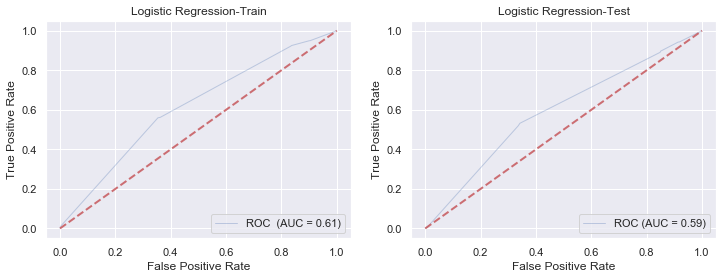

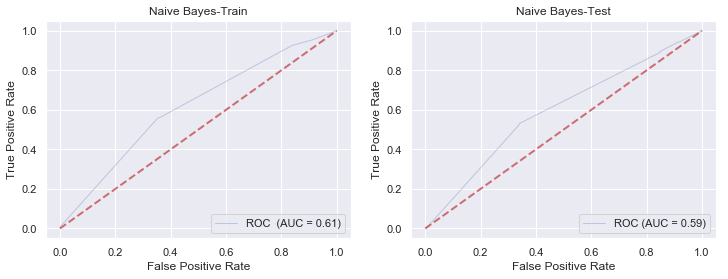

In [32]:
print("---Plot Classifiers-----")

def plot_classfier(classifer, title):
    resampling()
    fig, ax = plt.subplots(1,2,  figsize=(12,4))

    classifer.fit(X_train, y_train)
    viz = plot_roc_curve(classiferLR, X_train, y_train,
                                 name='ROC ' ,
                                 alpha=0.3, lw=1, ax=ax[0])
    ax[0].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',   label='Chance', alpha=.8)
    ax[0].set_title(title + "-Train")
    viz = plot_roc_curve(classiferLR, X_test, y_test,
                                 name='ROC'.format(1),
                                 alpha=0.3, lw=1, ax=ax[1])
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',   label='Chance', alpha=.8)
    ax[1].set_title(title + "-Test");
    
plot_classfier(classiferLR,'Logistic Regression')

plot_classfier(classiferNB,'Naive Bayes')